In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the stock data into a pandas dataframe
df = pd.read_csv('TSLA.csv')

In [3]:
# Define a function to identify the Piercing Line pattern
def is_piercing_line(row):
    # Check that the pattern exists
    if len(df) < 2 or row.name < 1:
        return False
    # Check that the pattern is a Piercing Line
    prev_close = df.loc[row.name - 1, 'Close']
    prev_open = df.loc[row.name - 1, 'Open']
    prev_body = prev_close - prev_open
    curr_close = row['Close']
    curr_open = row['Open']
    curr_body = curr_close - curr_open
    mid_prev = (prev_close + prev_open) / 2
    if (curr_close < curr_open) and (prev_close > prev_open) and (curr_open < mid_prev) and (curr_close > prev_open):
        return True
    else:
        return False

# Identify the Piercing Line patterns in the data
piercing_line_mask = df.apply(is_piercing_line, axis=1)
piercing_line_dates = df[piercing_line_mask]['Date']

In [4]:
# Print out the dates of the patterns
print('Dates of Piercing Line patterns:')
for date in piercing_line_dates:
    print(date)

Dates of Piercing Line patterns:
2023-01-05


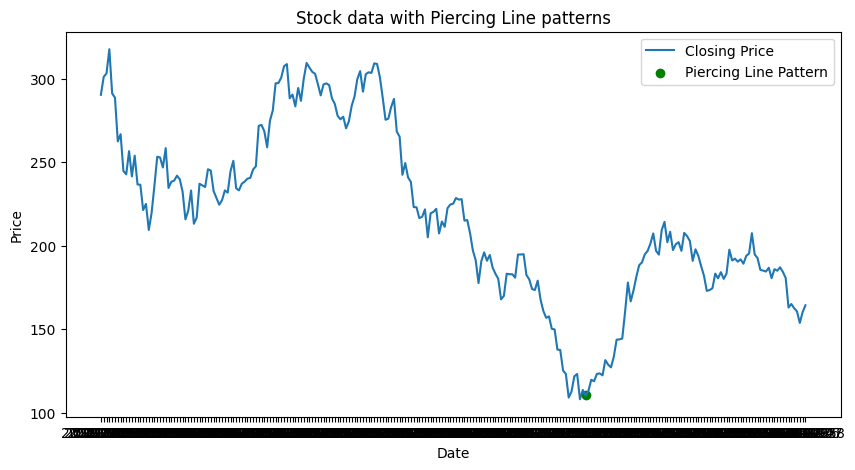

In [5]:
# Plot the stock data with the patterns highlighted
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df['Date'], df['Close'], label='Closing Price')
ax.scatter(piercing_line_dates, df[piercing_line_mask]['Close'], color='g', label='Piercing Line Pattern')
ax.set_title('Stock data with Piercing Line patterns')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()